In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('classic')
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load Data

In [2]:
train_f = pd.read_csv("train_features.csv")

In [3]:
train_f.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
train_s = pd.read_csv("train_salaries.csv")

In [5]:
train_s.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
train_merged = train_f.merge(train_s, on='jobId')

In [7]:
train_merged.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


# Exploratory Data Analysis

In [8]:
train_merged.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [9]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [10]:
train_merged['jobType'].value_counts()

SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64

In [11]:
train_merged['degree'].value_counts()

HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64

In [12]:
train_merged['major'].value_counts()

NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64

In [13]:
train_merged['industry'].value_counts()

WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64

In [14]:
train_merged['yearsExperience'].value_counts()

15    40312
1     40265
9     40235
3     40191
22    40187
8     40118
6     40095
18    40089
17    40072
7     40047
2     40045
4     40036
10    40032
23    40015
5     40013
20    39988
11    39949
16    39873
19    39860
24    39860
0     39839
14    39827
13    39826
21    39759
12    39467
Name: yearsExperience, dtype: int64

In [15]:
train_merged['companyId'].value_counts()

COMP39    16193
COMP35    16114
COMP59    16066
COMP30    16041
COMP3     16028
COMP40    16008
COMP44    16005
COMP51    16005
COMP9     15988
COMP56    15979
COMP54    15977
COMP46    15967
COMP58    15961
COMP19    15958
COMP32    15958
COMP18    15957
COMP13    15956
COMP43    15955
COMP21    15949
COMP42    15944
COMP62    15943
COMP25    15932
COMP48    15930
COMP23    15918
COMP4     15918
COMP20    15910
COMP10    15909
COMP14    15908
COMP22    15907
COMP37    15905
          ...  
COMP41    15859
COMP45    15850
COMP6     15837
COMP24    15831
COMP61    15822
COMP1     15820
COMP38    15819
COMP34    15810
COMP33    15801
COMP60    15799
COMP5     15798
COMP47    15796
COMP28    15794
COMP50    15791
COMP16    15783
COMP12    15783
COMP49    15779
COMP53    15776
COMP27    15773
COMP55    15767
COMP7     15767
COMP31    15756
COMP29    15754
COMP26    15750
COMP52    15737
COMP17    15715
COMP0     15666
COMP2     15641
COMP8     15638
COMP57    15635
Name: companyId, Length:

# Visualizing Data

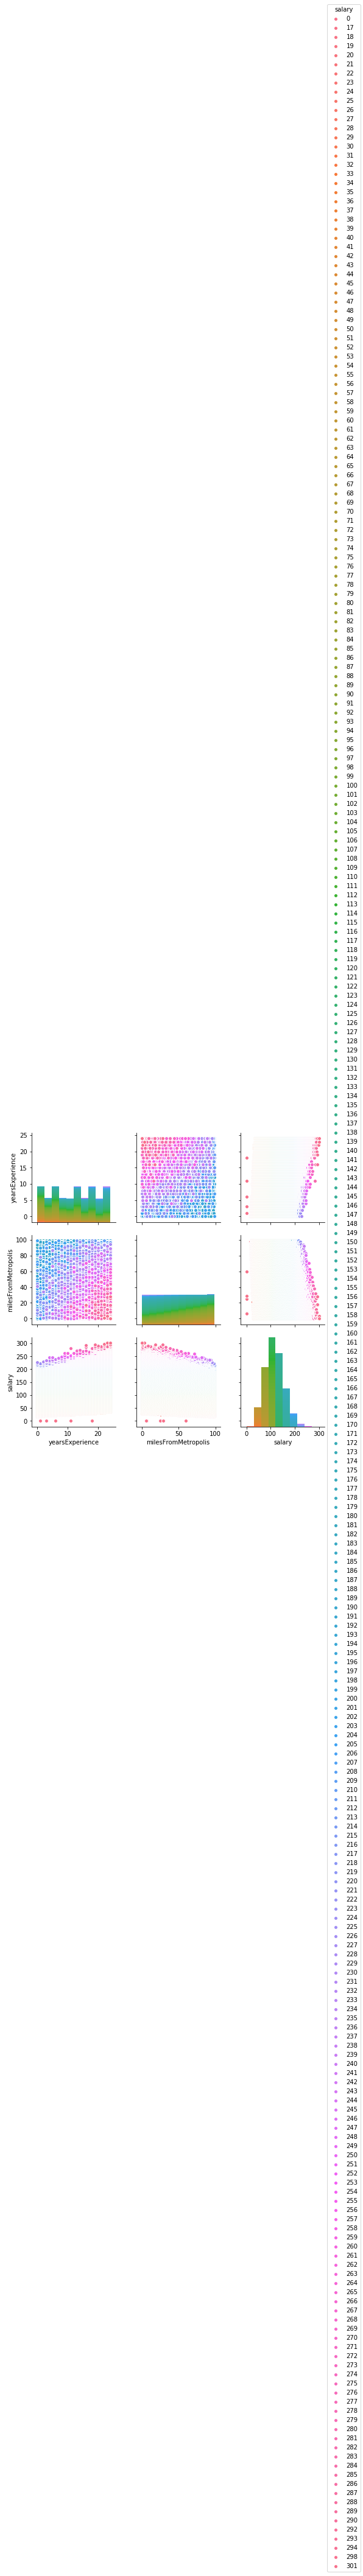

In [16]:
sns.pairplot(train_merged, hue='salary', size=2.5);

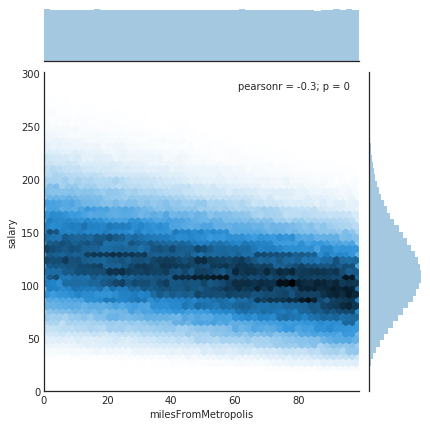

In [17]:
with sns.axes_style('white'):
    sns.jointplot("milesFromMetropolis", "salary", data=train_merged, kind='hex')

# Data Preparation for model building

In [18]:
col = ['companyId', 'jobType', 'degree', 'major', 'industry']

In [19]:
list(col)

['companyId', 'jobType', 'degree', 'major', 'industry']

In [20]:
#Create a dict. object 'd' to store all dummy variable data frames
d = {name: pd.get_dummies(train_merged[name], prefix=name) for name in col}

In [21]:
d

{'companyId':         companyId_COMP0  companyId_COMP1  companyId_COMP10  companyId_COMP11  \
 0                     0                0                 0                 0   
 1                     0                0                 0                 0   
 2                     0                0                 0                 0   
 3                     0                0                 0                 0   
 4                     0                0                 0                 0   
 5                     0                0                 0                 0   
 6                     0                0                 0                 0   
 7                     0                0                 0                 0   
 8                     0                0                 0                 0   
 9                     0                0                 0                 0   
 10                    0                0                 0                 0   
 11            

In [22]:
#deleting last column of each dataframe to remove multi-collinearity
for i in range(len(col)-1):
  d[col[i]].drop(d[col[i]].columns[d[col[i]].shape[1]-1], axis=1, inplace=True)

In [23]:
#Concat all dummy data frames
d = pd.concat(d, axis=1)

In [24]:
#Remove categorical variables from the training dataset
train_merged.drop(col, axis=1, inplace=True)

In [25]:
#Concatenate all the dummy variables to the training data set and store into a new data frame
train_model = pd.concat([train_merged, d], axis=1)

In [26]:
train_model.head()

,jobId,yearsExperience,milesFromMetropolis,salary,"(companyId, companyId_COMP0)","(companyId, companyId_COMP1)","(companyId, companyId_COMP10)","(companyId, companyId_COMP11)","(companyId, companyId_COMP12)","(companyId, companyId_COMP13)",...,"(jobType, jobType_MANAGER)","(jobType, jobType_SENIOR)","(major, major_BIOLOGY)","(major, major_BUSINESS)","(major, major_CHEMISTRY)","(major, major_COMPSCI)","(major, major_ENGINEERING)","(major, major_LITERATURE)","(major, major_MATH)","(major, major_NONE)"
0,JOB1362684407687,10,83,130,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,JOB1362684407688,3,73,101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,JOB1362684407689,10,38,137,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,JOB1362684407690,8,17,142,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,JOB1362684407691,8,16,163,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
## Drop jobId and companyId column
train_model.drop('jobId', inplace=True, axis=1) 

In [28]:
train_model

,yearsExperience,milesFromMetropolis,salary,"(companyId, companyId_COMP0)","(companyId, companyId_COMP1)","(companyId, companyId_COMP10)","(companyId, companyId_COMP11)","(companyId, companyId_COMP12)","(companyId, companyId_COMP13)","(companyId, companyId_COMP14)",...,"(jobType, jobType_MANAGER)","(jobType, jobType_SENIOR)","(major, major_BIOLOGY)","(major, major_BUSINESS)","(major, major_CHEMISTRY)","(major, major_COMPSCI)","(major, major_ENGINEERING)","(major, major_LITERATURE)","(major, major_MATH)","(major, major_NONE)"
0,10,83,130,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,73,101,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,10,38,137,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,17,142,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,8,16,163,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,31,113,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
6,23,24,178,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,9,70,73,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,1,54,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,17,68,104,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Training the model

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
X = train_model.drop('salary', axis=1)
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
gbm = GradientBoostingRegressor(n_estimators=150, max_depth=5, loss='ls', verbose=0)

In [35]:
lm.fit(X, train_model.salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
gbm.fit(X, train_model.salary)

In [ ]:
pred_train = lm.predict(X)

# Calculating Mean Square Error of our model

In [ ]:
np.mean((train_model.salary - gbm.predict(X)) ** 2)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(train_model.salary, lm.predict(X))

In [ ]:
pred_train

# Applying train model to test data

In [ ]:
test_s = pd.read_csv("test_features.csv")

In [ ]:
test_s.head()

In [ ]:
## Drop jobId and companyId column
test_s.drop('jobId', inplace=True, axis=1) 
test_s.drop('companyId', inplace=True, axis=1) 

In [ ]:
test_s.head()

In [ ]:
col = ['jobType', 'degree', 'major', 'industry']
#Create a dict. object 'd' to store all dummy variable data frames
d1 = {name: pd.get_dummies(test_s[name], prefix=name) for name in col1}
#deleting last column of each dataframe to remove multi-collinearity
for i in range(len(col)-1):
  d1[col[i]].drop(d1[col[i]].columns[d1[col[i]].shape[1]-1], axis=1, inplace=True)

In [ ]:
#Concat all dummy data frames
d1 = pd.concat(d1, axis=1)

In [ ]:
d1.head()

In [ ]:
#Remove categorical variables from the training dataset
test_s.drop(col1, axis=1, inplace=True)

In [ ]:
#Concatenate all the dummy variables to the training data set and store into a new data frame
test_model = pd.concat([test_s, d1], axis=1)

In [ ]:
test_model.head()

In [ ]:
pred_test = lm.predict(test_model)

In [ ]:
pred_test

In [ ]:
np.mean((train_model.salary - lm.predict(X)) ** 2)

In [ ]:
train_model.salary

In [ ]:
lm.predict(X)